## Iris Species Dataset                                                                                                                       

## Please star/ upvote if you find it helpful.

## CONTENTS::

[ **1 ) Importing Various Modules**](#content1)

 [ **2 ) Loading the Dataset**](#content2)

 [ **3 )Exploring the Dataset**](#content3)

 [ **4 ) Preparing the Data**](#content4)

 [ **5 ) Modelling**](#content5)

 [ **6 ) Comparing Different Algortihms**](#content6)

<a id="content1"></a>
## 1 ) Importing Various Modules

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  

#scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 

<a id="content2"></a>
## 2 ) Loading the Dataset

In [3]:
train=pd.read_csv(r'../input/Iris.csv')

In [4]:
df=train.copy()

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


<a id="content3"></a>
## 3 ) Exploring the Dataset

In [6]:
df.shape

(150, 6)

The dataset has 150 rows and 5 columns out of which the 'Species' is our target variable which we want to predict. 

In [7]:
df.columns # names of all coumns.

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Since the data frame is already indexed we will drop the 'Id' column.

In [8]:
df.drop(['Id'],axis=1,inplace=True)

In [9]:
df.index # indices of rows.

RangeIndex(start=0, stop=150, step=1)

#### Now we can check if any column has any null or 'Nan' values or not.

In [10]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

This shows that there aren't any 'Nan' values in any column.

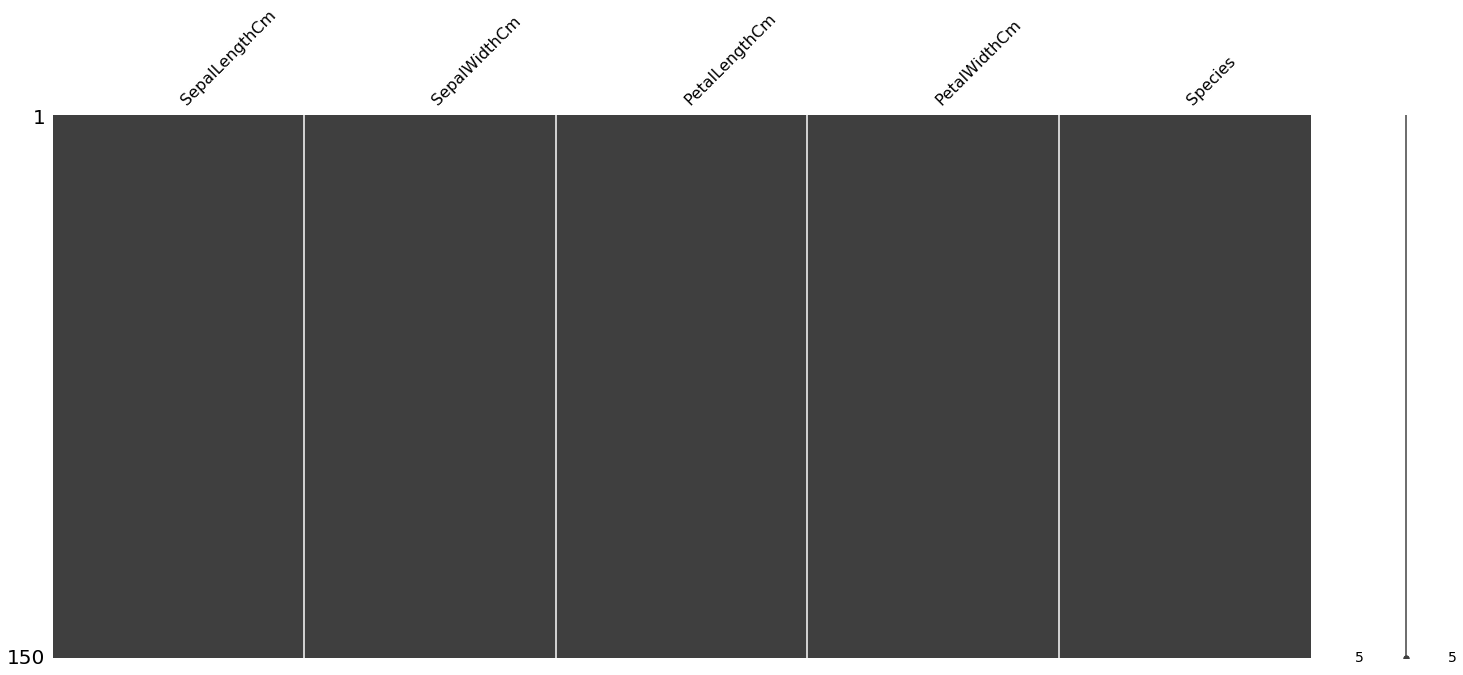

In [11]:
msno.matrix(df) # just one final time to visualize.

In [12]:
for col in df.columns:
    print("Number of values in column " ,col," : ",df[col].count())

Number of values in column  SepalLengthCm  :  150
Number of values in column  SepalWidthCm  :  150
Number of values in column  PetalLengthCm  :  150
Number of values in column  PetalWidthCm  :  150
Number of values in column  Species  :  150


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This shows the different statistical quantities like mean, median etc.. of all the numeric columns in the data frame.

####  VISUALIZING THE DISTRIBUTIION OF FEATURES.

In [14]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

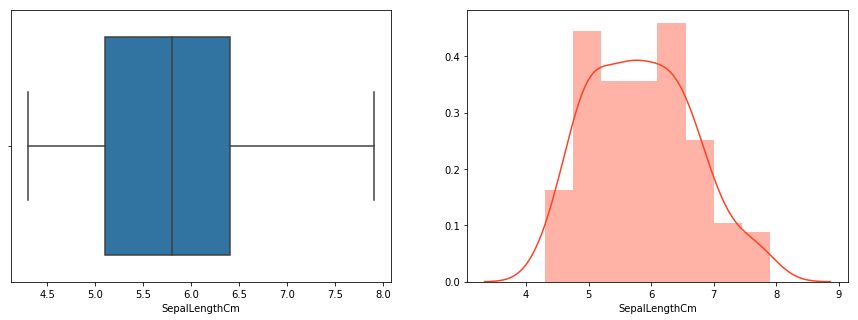

In [15]:
plot('SepalLengthCm')

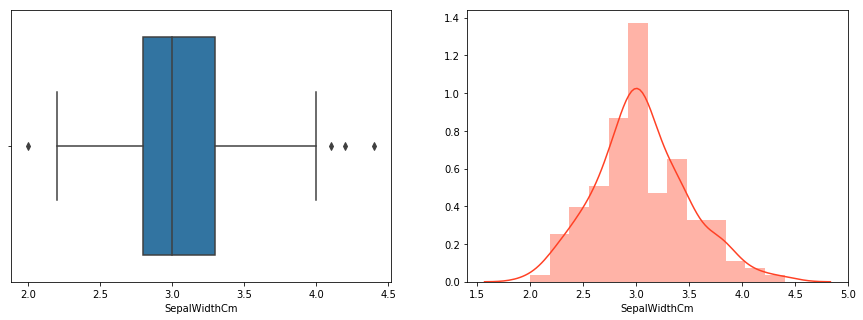

In [16]:
plot('SepalWidthCm')

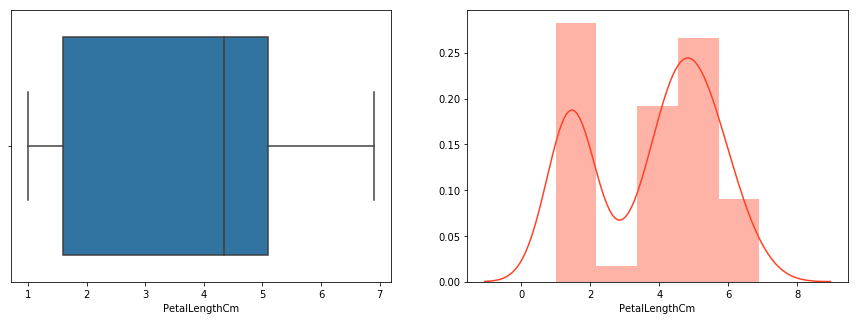

In [17]:
plot('PetalLengthCm')

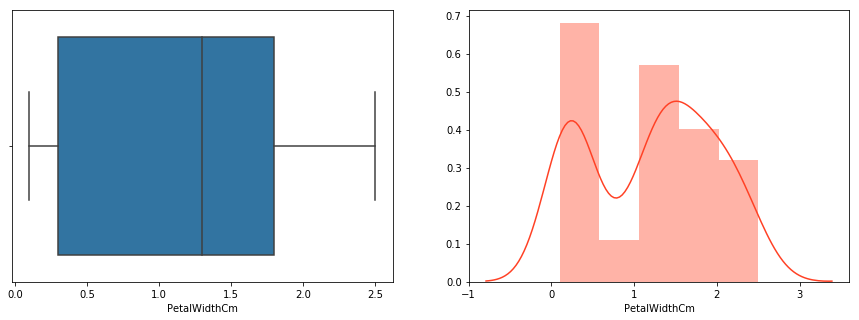

In [18]:
plot('PetalWidthCm')

<a id="content4"></a>
## 4 ) Preparing the Data

#### LABEL ENCODING THE TARGET

Since the algorithms accept only numeric values we will encode the 'Species' column using the Labelencoder() from scikit learn.

In [19]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

#### NORMALIZING FEATURES 

Normalizing the features give better performance. Hence I have normalized all the features by scaling them to 0 mean and a unit standard deviation.

In [20]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Species',axis=1))
X=scaled_df
Y=df['Species'].as_matrix()

In [21]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### SPLITTING INTO TRAINING & VALIDATION SETS.

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

<a id="content5"></a>
## 5 ) MODELLING

#### LOGISTIC REGRESSION

In [23]:
clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


#### kNN

In [24]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


#### Linear Support Vector Machine(SVM)

In [25]:
clf_svm_lin=LinearSVC()
clf_svm_lin.fit(x_train,y_train)
pred=clf_svm_lin.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


#### SVM (with 'rbf' kernel)

In [26]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


<a id="content6"></a>
## 6 ) COMPARING DIFFERENT ALGORITHMS

In [27]:
models=[LogisticRegression(),LinearSVC(),SVC(),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [28]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.966667
1,LinearSVM,1.000000
2,rbfSVM,1.000000
3,KNearestNeighbors,1.000000


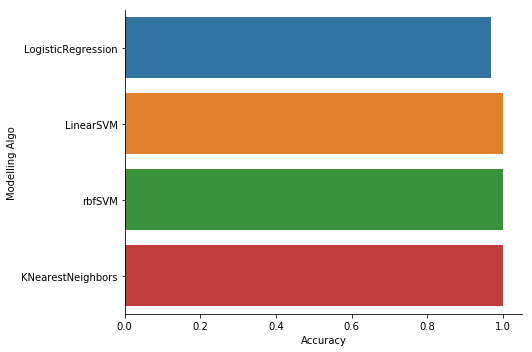

In [29]:
sns.factorplot(data=acc_frame,y='Modelling Algo',x='Accuracy',kind='bar',size=5,aspect=1.5)

##  THE END !!!

## Please star/upvote if you liked it.